# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

# Reading Dataset

In [2]:
df=pd.read_csv("C:\\Users\\ujjwa\\Desktop\\Projects\\Hotel Booking prediction\\Data\\hotel_bookings.csv")

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [4]:
df.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

# Data Cleaning

In [5]:
df.shape

(119390, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
#Here columns agen and company comprises of ID's, making no sense in model building. so we can drop these columns.
#missing values in country column can be imputed with mode of the column.

In [9]:
df.drop(columns=['agent','company'],axis=1,inplace=True)

In [10]:
df['country'].fillna(df['country'].value_counts().index[0],inplace=True)

In [11]:
df.fillna(0,inplace=True)

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [13]:
#No missing values now.

In [14]:
filter1 = (df['children']==0) & (df['adults']==0) & (df['babies']==0)

In [15]:
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [16]:
#There are 180 rows where adult,babies and childrens are 0 simultaneously, making no sense out of which.Thus removing all such rows.

In [17]:
df1=df[~filter1]

In [18]:
df1.shape

(119210, 30)

In [19]:
df1['is_canceled'].unique()

array([0, 1], dtype=int64)

In [20]:
df1[df1['is_canceled']==0]['country'].value_counts(normalize=True)

PRT    0.285265
GBR    0.128888
FRA    0.112890
ESP    0.085094
DEU    0.080881
         ...   
BHR    0.000013
DJI    0.000013
MLI    0.000013
NPL    0.000013
FRO    0.000013
Name: country, Length: 165, dtype: float64

In [21]:
df1.country.value_counts()

PRT    48961
GBR    12120
FRA    10401
ESP     8560
DEU     7285
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [22]:
country_wise_data=df1[df1['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_data.columns=['country','no. of guests']

In [23]:
country_wise_data

,country,no. of guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [24]:
#Lets  visualise the country wise data using a Geographical map.

In [25]:
!pip install chart_studio

In [26]:
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode ,plot ,iplot
init_notebook_mode(connected=True)

In [27]:
import plotly.express as px

In [28]:
px.choropleth(country_wise_data,locations=country_wise_data['country'],
             color=country_wise_data['no. of guests'],
             hover_name=country_wise_data['country'],
             title='home country of guests')

In [29]:
#From the above geographical map we can observe that most of the guests are from Portugal with the guest count of 21.398k.

In [30]:
df2=df1[df1['is_canceled']==0]

In [31]:
df2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0, 0.5, 'price(Euro)')

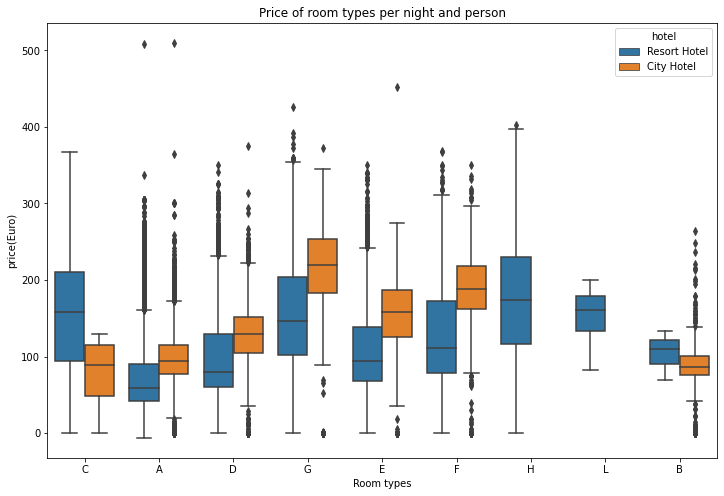

In [32]:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',y='adr',hue='hotel',data=df2)
plt.title('Price of room types per night and person')
plt.xlabel('Room types')
plt.ylabel('price(Euro)')

In [33]:
#From the above boxplot we can infer that among City Hotel, G room category is performing well.
#While among Resort Hotels, H room category is doing well.

In [34]:
df1_resort_hotel=df1[(df1['hotel']=='Resort Hotel')&(df1['is_canceled']==0)]
df1_city_hotel=df1[(df1['hotel']=='City Hotel')&(df1['is_canceled']==0)]

In [35]:
df1_resort_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [36]:
rush_resort=df1_resort_hotel['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month','no. of guests']
rush_resort

,month,no. of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [37]:
rush_city=df1_city_hotel['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month','no. of guests']
rush_city

,month,no. of guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [38]:
final_rush=rush_resort.merge(rush_city,on='month')

In [39]:
final_rush.columns=['month','guests_in_resort','guests_in_city']

In [40]:
final_rush

,month,guests_in_resort,guests_in_city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [41]:
#Lets install few libraries in order to sort final_rush in the order of months.
!pip install sorted-months-weekdays
!pip install sort_dataframeby_monthorweek

In [42]:
import sort_dataframeby_monthorweek as sd

In [43]:
final_rush=sd.Sort_Dataframeby_Month(final_rush,'month')

In [44]:
final_rush.columns

Index(['month', 'guests_in_resort', 'guests_in_city'], dtype='object')

In [45]:
px.line(data_frame=final_rush,x='month',y=['guests_in_resort','guests_in_city'])

In [46]:
#From the above lineplot we can infer that August is the month having maximum no. of guests.
#We can say that months, May,July,August,September are the Rush months.

In [47]:
df1=sd.Sort_Dataframeby_Month(df1,'arrival_date_month')

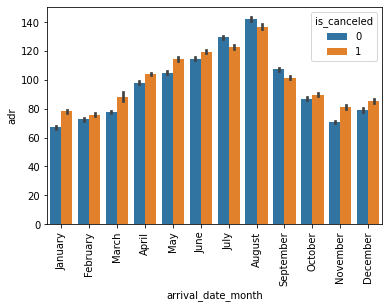

In [48]:
sns.barplot(x='arrival_date_month',y='adr',hue='is_canceled',data=df1)
plt.xticks(rotation='vertical')
plt.show()

In [49]:
#We can infer that number of canceled bookings are all time higher for the corresponding months that may be because
#high adr

In [50]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [51]:
pd.crosstab(index=df1['stays_in_weekend_nights'],columns=df1['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
def week_func(row):
    feature_1='stays_in_weekend_nights'
    feature_2='stays_in_week_nights'
    
    if row[feature_1]>0 and row[feature_2]==0:
        return 'stay_just_weekend'
    elif row[feature_1]==0 and row[feature_2]>0:
        return 'stay_just_weekdays'
    elif row[feature_1]>0 and row[feature_2]>0:
        return 'stay_both_weekend_weekday'
    else:
        return 'undefined_data'

In [53]:
df2['weekday_or_weekend']=df2.apply(week_func,axis=1)

In [54]:
df2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekday_or_weekend
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,stay_just_weekdays
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,stay_just_weekdays
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015,stay_just_weekdays


In [55]:
df2['weekday_or_weekend'].value_counts()

stay_both_weekend_weekday    37551
stay_just_weekdays           31788
stay_just_weekend             5050
undefined_data                 622
Name: weekday_or_weekend, dtype: int64

In [56]:
df2=sd.Sort_Dataframeby_Month(df2,'arrival_date_month')

In [57]:
df2.groupby(['arrival_date_month','weekday_or_weekend']).size()

arrival_date_month  weekday_or_weekend       
April               stay_both_weekend_weekday    3627
                    stay_just_weekdays           2559
                    stay_just_weekend             344
                    undefined_data                 30
August              stay_both_weekend_weekday    4929
                    stay_just_weekdays           3137
                    stay_just_weekend             509
                    undefined_data                 49
December            stay_both_weekend_weekday    1901
                    stay_just_weekdays           2123
                    stay_just_weekend             298
                    undefined_data                 69
February            stay_both_weekend_weekday    2438
                    stay_just_weekdays           2514
                    stay_just_weekend             360
                    undefined_data                 47
January             stay_both_weekend_weekday    1550
                    stay_just_weekda

In [58]:
df2.groupby(['arrival_date_month','weekday_or_weekend']).size().unstack()

weekday_or_weekend,stay_both_weekend_weekday,stay_just_weekdays,stay_just_weekend,undefined_data
arrival_date_month,,,,
April,3627,2559,344,30
August,4929,3137,509,49
December,1901,2123,298,69
February,2438,2514,360,47
January,1550,2125,393,47
July,4570,2818,462,57
June,3241,2685,433,36
March,3151,3060,359,50
May,3442,3017,570,74


In [59]:
group_data=df2.groupby(['arrival_date_month','weekday_or_weekend']).size().unstack().reset_index()

In [60]:
sorted_data=sd.Sort_Dataframeby_Month(group_data,'arrival_date_month')

In [61]:
sorted_data.set_index('arrival_date_month',inplace=True)

In [62]:
sorted_data

,stay_both_weekend_weekday,stay_just_weekdays,stay_just_weekend,undefined_data
arrival_date_month,,,,
January,1550,2125,393,47
February,2438,2514,360,47
March,3151,3060,359,50
April,3627,2559,344,30
May,3442,3017,570,74
June,3241,2685,433,36
July,4570,2818,462,57
August,4929,3137,509,49
September,3192,2692,479,22


<AxesSubplot:xlabel='arrival_date_month'>

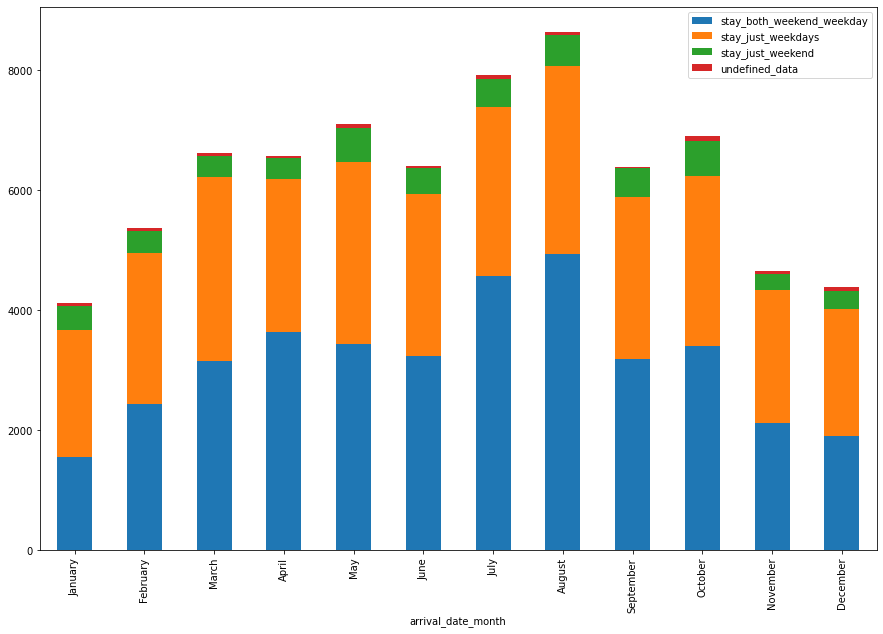

In [63]:
sorted_data.plot(kind='bar',stacked=True,figsize=(15,10))

In [64]:
#We can infer that most bookings were made for weekdays and for both weekend and weekdays.

# Feature Engineering:

In [65]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [66]:
def family(row):
    if (row['adults']>0) & (row['children']>0 or row['babies']>0):
        return 1
    else:
        return 0

In [67]:
df['is_family']=df.apply(family,axis=1)

In [68]:
df['total_customer']=df['adults']+df['babies']+df['children']

In [69]:
df['total_nights']=df['stays_in_week_nights']+df['stays_in_weekend_nights']

In [70]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,7/1/2015,0,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,7/1/2015,0,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,7/2/2015,0,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,7/2/2015,0,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,7/3/2015,0,2.0,2


In [71]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights'],
      dtype='object')

In [72]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [73]:
dict1={'No Deposit':0, 'Non Refund':1, 'Refundable':0}

In [74]:
df['deposit_given']=df['deposit_type'].map(dict1)

In [75]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [76]:
df.drop(columns=['adults', 'children', 'babies','deposit_type'],axis=1,inplace=True)

In [77]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights,deposit_given
0,Resort Hotel,0,342,2015,July,27,1,0,0,BB,...,Transient,0.0,0,0,Check-Out,7/1/2015,0,2.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,BB,...,Transient,0.0,0,0,Check-Out,7/1/2015,0,2.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,BB,...,Transient,75.0,0,0,Check-Out,7/2/2015,0,1.0,1,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,BB,...,Transient,75.0,0,0,Check-Out,7/2/2015,0,1.0,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,Transient,98.0,0,1,Check-Out,7/3/2015,0,2.0,2,0


In [78]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests         

# Encoding:

In [79]:
cat_features=[col for col in df.columns if df[col].dtype=='object']
num_features=[col for col in df.columns if df[col].dtype!='object']

In [80]:
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [81]:
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_family',
 'total_customer',
 'total_nights',
 'deposit_given']

In [86]:
df_cat=df[cat_features]

In [87]:
df.groupby(['hotel'])['is_canceled'].mean().to_dict()

{'City Hotel': 0.41726963317786464, 'Resort Hotel': 0.27763354967548676}

In [88]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [90]:
df_cat['cancellation']=df['is_canceled']

In [91]:
df_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,7/1/2015,0
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,7/1/2015,0
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,Transient,Check-Out,7/2/2015,0
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,Transient,Check-Out,7/2/2015,0
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,Transient,Check-Out,7/3/2015,0


In [92]:
cols=df_cat.columns

In [93]:
cols=cols[0:-1]

In [94]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

In [95]:
#Performing target encoding over categorical features:
for col in cols:
    dict2=df_cat.groupby([col])['cancellation'].mean().to_dict()
    df_cat[col]=df_cat[col].map(dict2)

In [96]:
df_cat.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277634,0.374536,0.373849,0.562085,0.153419,0.174599,0.330472,0.187789,0.407463,0.0,0.800000,0
1,0.277634,0.374536,0.373849,0.562085,0.153419,0.174599,0.330472,0.187789,0.407463,0.0,0.800000,0
2,0.277634,0.374536,0.373849,0.202243,0.153419,0.174599,0.391074,0.187789,0.407463,0.0,0.985075,0


# Outliers Treatment:

In [97]:
df[num_features]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0,342,2015,27,1,0,0,0,0,0,3,0,0.00,0,0,0,2.0,0,0
1,0,737,2015,27,1,0,0,0,0,0,4,0,0.00,0,0,0,2.0,0,0
2,0,7,2015,27,1,0,1,0,0,0,0,0,75.00,0,0,0,1.0,1,0
3,0,13,2015,27,1,0,1,0,0,0,0,0,75.00,0,0,0,1.0,1,0
4,0,14,2015,27,1,0,2,0,0,0,0,0,98.00,0,1,0,2.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,0,0,0,0,0,96.14,0,0,0,2.0,7,0
119386,0,102,2017,35,31,2,5,0,0,0,0,0,225.43,0,2,0,3.0,7,0
119387,0,34,2017,35,31,2,5,0,0,0,0,0,157.71,0,4,0,2.0,7,0
119388,0,109,2017,35,31,2,5,0,0,0,0,0,104.40,0,0,0,2.0,7,0


In [99]:
data=pd.concat([df_cat,df[num_features]],axis=1)

In [100]:
data

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277634,0.374536,0.373849,0.562085,0.153419,0.174599,0.330472,0.187789,0.407463,0.0,...,0,3,0,0.00,0,0,0,2.0,0,0
1,0.277634,0.374536,0.373849,0.562085,0.153419,0.174599,0.330472,0.187789,0.407463,0.0,...,0,4,0,0.00,0,0,0,2.0,0,0
2,0.277634,0.374536,0.373849,0.202243,0.153419,0.174599,0.391074,0.187789,0.407463,0.0,...,0,0,0,75.00,0,0,0,1.0,1,0
3,0.277634,0.374536,0.373849,0.202243,0.187347,0.220758,0.391074,0.444925,0.407463,0.0,...,0,0,0,75.00,0,0,0,1.0,1,0
4,0.277634,0.374536,0.373849,0.202243,0.367211,0.410259,0.391074,0.444925,0.407463,0.0,...,0,0,0,98.00,0,1,0,2.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.417270,0.377531,0.373849,0.202391,0.343160,0.410259,0.391074,0.444925,0.407463,0.0,...,0,0,0,96.14,0,0,0,2.0,7,0
119386,0.417270,0.377531,0.373849,0.185694,0.367211,0.410259,0.292884,0.252114,0.407463,0.0,...,0,0,0,225.43,0,2,0,3.0,7,0
119387,0.417270,0.377531,0.373849,0.167147,0.367211,0.410259,0.317796,0.251244,0.407463,0.0,...,0,0,0,157.71,0,4,0,2.0,7,0
119388,0.417270,0.377531,0.373849,0.202243,0.367211,0.410259,0.391074,0.444925,0.407463,0.0,...,0,0,0,104.40,0,0,0,2.0,7,0


In [101]:
data.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [102]:
data.drop(['cancellation'],axis=1,inplace=True)

In [103]:
data.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277634,0.374536,0.373849,0.562085,0.153419,0.174599,0.330472,0.187789,0.407463,0.0,...,0,3,0,0.0,0,0,0,2.0,0,0
1,0.277634,0.374536,0.373849,0.562085,0.153419,0.174599,0.330472,0.187789,0.407463,0.0,...,0,4,0,0.0,0,0,0,2.0,0,0
2,0.277634,0.374536,0.373849,0.202243,0.153419,0.174599,0.391074,0.187789,0.407463,0.0,...,0,0,0,75.0,0,0,0,1.0,1,0
3,0.277634,0.374536,0.373849,0.202243,0.187347,0.220758,0.391074,0.444925,0.407463,0.0,...,0,0,0,75.0,0,0,0,1.0,1,0
4,0.277634,0.374536,0.373849,0.202243,0.367211,0.410259,0.391074,0.444925,0.407463,0.0,...,0,0,0,98.0,0,1,0,2.0,2,0


<AxesSubplot:xlabel='lead_time', ylabel='Density'>

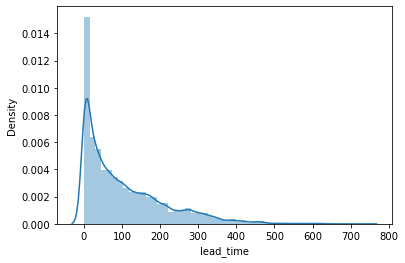

In [105]:
sns.distplot(data['lead_time'])

In [106]:
def handle_outlier(col):
    data[col]=np.log1p(data[col])

In [107]:
handle_outlier('lead_time')

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

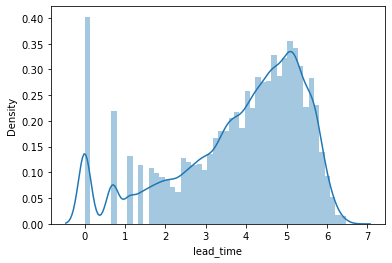

In [108]:
sns.distplot(data['lead_time'])

<AxesSubplot:xlabel='adr', ylabel='Density'>

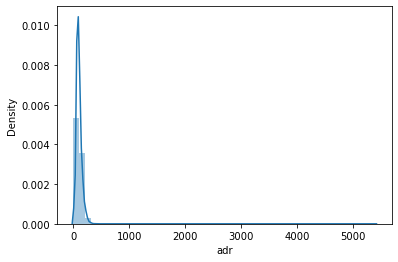

In [109]:
sns.distplot(data['adr'])

In [110]:
handle_outlier('adr')

In [111]:
data['adr'].isnull().sum()

1

In [112]:
### now why this missing value , as we have already deal with the missing values..'
### bcz we have negative value in 'adr' feature as '-6.38'  ,& if we apply ln(1+x) , we will get 'nan'
## bcz log wont take negative values..

<AxesSubplot:xlabel='adr', ylabel='Density'>

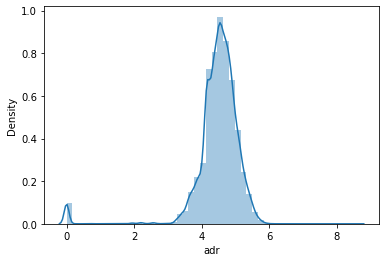

In [113]:
sns.distplot(data['adr'].dropna())

# Feature selection using correlation and univariate analysis:

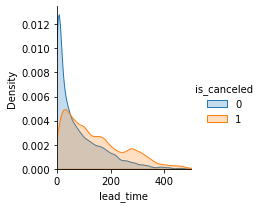

In [115]:
sns.FacetGrid(df,hue='is_canceled',xlim=(0,500)).map(sns.kdeplot,'lead_time',shade=True).add_legend()

In [ ]:
#Here as overlapping is not complete, so we can say feature,'lead_time' is significantly important.

In [116]:
#To be more precise we may continue with the correlation technique:

In [117]:
corr=data.corr()

In [118]:
corr

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
hotel,1.000000,0.050756,0.057622,-0.040227,0.102285,0.181762,0.194901,0.276679,-0.008169,0.136531,...,-0.004441,-0.072820,0.072432,0.145963,-0.218873,-0.043390,-0.058306,-0.040821,-0.247479,0.172003
arrival_date_month,0.050756,1.000000,-0.010303,-0.052759,0.047829,0.076740,-0.038749,0.016243,-0.029702,0.070220,...,-0.021983,-0.011999,0.029013,0.226039,-0.021814,0.002830,0.020900,0.080552,0.045113,0.057355
meal,0.057622,-0.010303,1.000000,0.024843,-0.025331,-0.027224,0.007067,0.010507,0.103201,0.050480,...,0.011436,-0.025668,-0.030818,-0.020116,0.004307,0.005591,0.002636,-0.003021,-0.053849,0.049566
country,-0.040227,-0.052759,0.024843,1.000000,0.078958,-0.129879,0.152560,0.124445,-0.029103,0.356621,...,0.091750,-0.059883,0.066900,-0.160724,0.007490,-0.200634,-0.044301,-0.118489,-0.160091,0.395007
market_segment,0.102285,0.047829,-0.025331,0.078958,1.000000,0.540348,0.177816,0.207752,-0.265928,0.266781,...,-0.117015,-0.058221,0.096609,-0.003582,-0.145640,-0.155149,-0.104478,-0.022562,-0.005142,0.397290
distribution_channel,0.181762,0.076740,-0.027224,-0.129879,0.540348,1.000000,0.067420,0.118054,-0.023349,0.177128,...,-0.142214,-0.118197,0.048063,0.126624,-0.146449,0.075135,-0.026177,0.088491,0.083968,0.115245
reserved_room_type,0.194901,-0.038749,0.007067,0.152560,0.177816,0.067420,1.000000,0.716492,-0.141027,0.073663,...,0.022101,-0.039305,0.067059,-0.189387,-0.092079,-0.160078,-0.131945,-0.245587,-0.185975,0.197918
assigned_room_type,0.276679,0.016243,0.010507,0.124445,0.207752,0.118054,0.716492,1.000000,-0.083194,0.202974,...,-0.003090,-0.104468,0.066543,-0.026292,-0.129887,-0.134601,-0.177486,-0.219960,-0.105767,0.262230
customer_type,-0.008169,-0.029702,0.103201,-0.029103,-0.265928,-0.023349,-0.141027,-0.083194,1.000000,0.136439,...,0.024766,-0.094680,-0.102072,0.115070,0.061875,0.137199,0.106556,0.123664,0.036724,0.121686
reservation_status,0.136531,0.070220,0.050480,0.356621,0.266781,0.177128,0.073663,0.202974,0.136439,1.000000,...,-0.057358,-0.144381,0.054186,0.083091,-0.195498,-0.234658,-0.013010,0.046522,0.017779,0.481457


In [119]:
#since target variable is ,'is_canceled'. So finding correlations wrt it.

In [121]:
corr['is_canceled'].sort_values(ascending=False)

reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.487923
deposit_given                     0.481457
country                           0.356621
lead_time                         0.320063
market_segment                    0.266781
assigned_room_type                0.202974
distribution_channel              0.177128
hotel                             0.136531
customer_type                     0.136439
previous_cancellations            0.110133
adr                               0.083091
reserved_room_type                0.073663
arrival_date_month                0.070220
days_in_waiting_list              0.054186
meal                              0.050480
total_customer                    0.046522
stays_in_week_nights              0.024765
total_nights                      0.017779
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
stays_in_weekend_nights          -0.001791
arrival_dat

In [122]:
#We should be dropping the features that are both highly as well as leastr correlated with the target variables.

In [123]:
corr['is_canceled'].sort_values(ascending=False).index

Index(['reservation_status', 'is_canceled', 'reservation_status_date',
       'deposit_given', 'country', 'lead_time', 'market_segment',
       'assigned_room_type', 'distribution_channel', 'hotel', 'customer_type',
       'previous_cancellations', 'adr', 'reserved_room_type',
       'arrival_date_month', 'days_in_waiting_list', 'meal', 'total_customer',
       'stays_in_week_nights', 'total_nights', 'arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month', 'is_family',
       'previous_bookings_not_canceled', 'is_repeated_guest',
       'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [124]:
features_to_drop=['reservation_status', 'reservation_status_date','arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month']

In [125]:
data.drop(features_to_drop,axis=1,inplace=True)

In [126]:
data.shape

(119390, 24)

In [127]:
data.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
customer_type                     0
is_canceled                       0
lead_time                         0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
is_family                         0
total_customer                    0
total_nights                      0
deposit_given                     0
dtype: int64

In [128]:
data.dropna(inplace=True)

In [129]:
#seperating dependent and independfent features:

In [130]:
x=data.drop('is_canceled',axis=1)
y=data['is_canceled']

# Selecting best Features:

In [131]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [132]:
##Lasso(alpha=0.005)
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.


In [133]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005))

In [134]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [135]:
feature_sel_model.get_support()

array([False, False, False,  True, False, False, False, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True])

In [139]:
cols=x.columns

In [140]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'lead_time', 'stays_in_week_nights',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

In [141]:
selected_features=cols[feature_sel_model.get_support()]

In [142]:
selected_features

Index(['country', 'lead_time', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customer', 'total_nights',
       'deposit_given'],
      dtype='object')

In [143]:
x=x[selected_features]

In [144]:
y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119389, dtype: int64

# Model Building:

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.25)

In [148]:
X_train.shape

(89541, 12)

In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
logreg=LogisticRegression()

In [151]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [152]:
pred=logreg.predict(X_test)

In [153]:
pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [154]:
from sklearn.metrics import confusion_matrix

In [155]:
confusion_matrix(y_test,pred)

array([[17490,  1310],
       [ 4658,  6390]], dtype=int64)

In [156]:
from sklearn.metrics import accuracy_score

In [157]:
accuracy_score(y_test,pred)

0.8000536049316537

# Cross Validation:

In [158]:
#Perfroming cross validation over logreg model in order to check whether the accuracy improves or not.

In [159]:
from sklearn.model_selection import cross_val_score

In [160]:
score=cross_val_score(logreg,x,y,cv=10)

In [161]:
score

array([0.78599548, 0.74486975, 0.84420806, 0.74302705, 0.73188709,
       0.78457157, 0.73942541, 0.80425496, 0.79713544, 0.90308259])

In [162]:
score.mean()

0.7878457415411124

In [163]:
#Accuracy remain approx same and relatively lesser.


# Implementing Multiple Algorithms:


In [165]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [168]:
models=[]

models.append(('LogisticRegression',LogisticRegression()))
models.append(('Naive_bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('Decision_tree',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))

In [170]:
for name,model in models:
    print(name)
    model.fit(X_train,y_train)
    
    predictions=model.predict(X_test)
    
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    
    acc=accuracy_score(predictions,y_test)
    print(acc)
    print('After cross validation:')
    score=cross_val_score(model,x,y,cv=10)
    print(score.mean())
    print('\n')
    

LogisticRegression
[[17490  4658]
 [ 1310  6390]]
0.8000536049316537
After cross validation:
0.7878457415411124


Naive_bayes
[[ 6447   631]
 [12353 10417]]
0.5649959796301259
After cross validation:
0.5696913560333101


Random Forest
[[17220  2718]
 [ 1580  8330]]
0.8560037523452158
After cross validation:
0.752154944079604


Decision_tree
[[16024  2643]
 [ 2776  8405]]
0.8184467971053337
After cross validation:
0.7011365426285803


KNN
[[16707  3367]
 [ 2093  7681]]
0.8170731707317073
After cross validation:
0.7254521058918886




# We can Conclude that Random forest model without CV to be performing the best by giving an accuracy of 85.6% among all the models.